### Dataset

**Breast Cancer Wisconsin (Diagnostic)** <br>
Link: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [1]:
import pandas as pd

In [2]:
df_bcw = pd.read_csv('datasets/breast_cancer _wisconsin.csv')

In [3]:
df_bcw.shape

(569, 33)

In [4]:
df_bcw.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df_bcw['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [7]:
#len(df_bcw['diagnosis'])

In [8]:
df_bcw['diagnosis'] = pd.factorize(df_bcw['diagnosis'])[0]

In [9]:
df_bcw['diagnosis'].unique()

array([0, 1])

In [10]:
df_bcw.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [11]:
df_bcw.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [12]:
training_columns = df_bcw.columns[2:-1]

In [13]:
y_labels = df_bcw['diagnosis']

In [14]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import Ridge


from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from math import sqrt

In [15]:
regressors = [
    {'name': 'KNeighborsRegressor', 'regressor': KNeighborsRegressor()},
    {'name': 'DecisionTreeRegressor', 'regressor': DecisionTreeRegressor()},
    {'name': 'Ridge', 'regressor': Ridge()},
    {'name': 'BayesianRidge', 'regressor': BayesianRidge()}
]

In [16]:
X = df_bcw[training_columns].values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y_labels, test_size=0.2)

In [18]:
regressor_score_rmse_data = np.array([])
best_rmse = 1.0 
best_regr = None

for regressor in regressors:
    #print(regressor['regressor'])
    
    regr = regressor['regressor'].fit(X_train, y_train)
    score = regr.score(X_test, y_test)
    y_pred = regr.predict(X_test)
    
    rmse = sqrt(mean_squared_error(y_test, y_pred, squared=False))

    if(best_rmse > rmse):
        best_rmse = rmse
        best_regr = regr
        
    line = [
        regressor['name'],
        score,
        rmse
    ]
    
    regressor_score_rmse_data = np.concatenate(
        (regressor_score_rmse_data, line)
    )

In [19]:
regressor_score_rmse_data = regressor_score_rmse_data.reshape(4,3)

In [20]:
regressor_score_rmse_data

array([['KNeighborsRegressor', '0.7927965252255261',
        '0.4673836459581145'],
       ['DecisionTreeRegressor', '0.8095556298028733',
        '0.45763189808605753'],
       ['Ridge', '0.723138763142118', '0.5025043113398089'],
       ['BayesianRidge', '0.722943532645298', '0.5025928739678694']],
      dtype='<U32')

In [21]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%f' % height,
                ha='center', va='bottom')

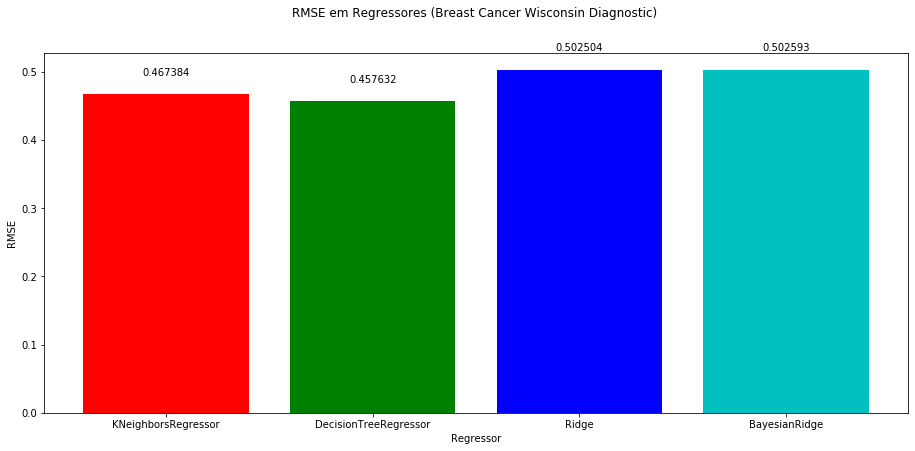

In [24]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,5))
ax = fig.add_axes([0,0,1,1])
ax.set_title('RMSE em Regressores (Breast Cancer Wisconsin Diagnostic) \n\n')

rects = ax.bar(
        regressor_score_rmse_data[:,0], 
        regressor_score_rmse_data[:,2].astype(float), color='rgbc'
    )

plt.ylabel('RMSE')
plt.xlabel('Regressor')

autolabel(rects)

plt.show()

Calculo do k-Fold do melhor regressor

In [25]:
from numpy import array
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

data = X
K = len(np.unique(y_labels)) + 1

kfold = KFold(K, True)

print('Best Regressor: ' + str(best_regr))
print('Cross-validation Score:')
print(cross_val_score(best_regr, X, y_labels, cv=kfold))

Best Regressor: DecisionTreeRegressor()
Cross-validation Score:
[0.68856106 0.65864175 0.70504202]
